In [15]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools 
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


IndexError: list index out of range

In [17]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [78]:
#function for processing image 
#load_img is from keras api, used to resize image as 224x224 as mobilenet requires it like that
#np.expand_dims is for shaping the dimensions of the image as mobilenet expects
#processing function for mobilenet is tf.keras.applications.mobilenet.preprocess_input
#C:\Users\prash\RISL
def prepare_image(file):
    img_path = 'C:/Users/prash/RISL/'
    img = image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

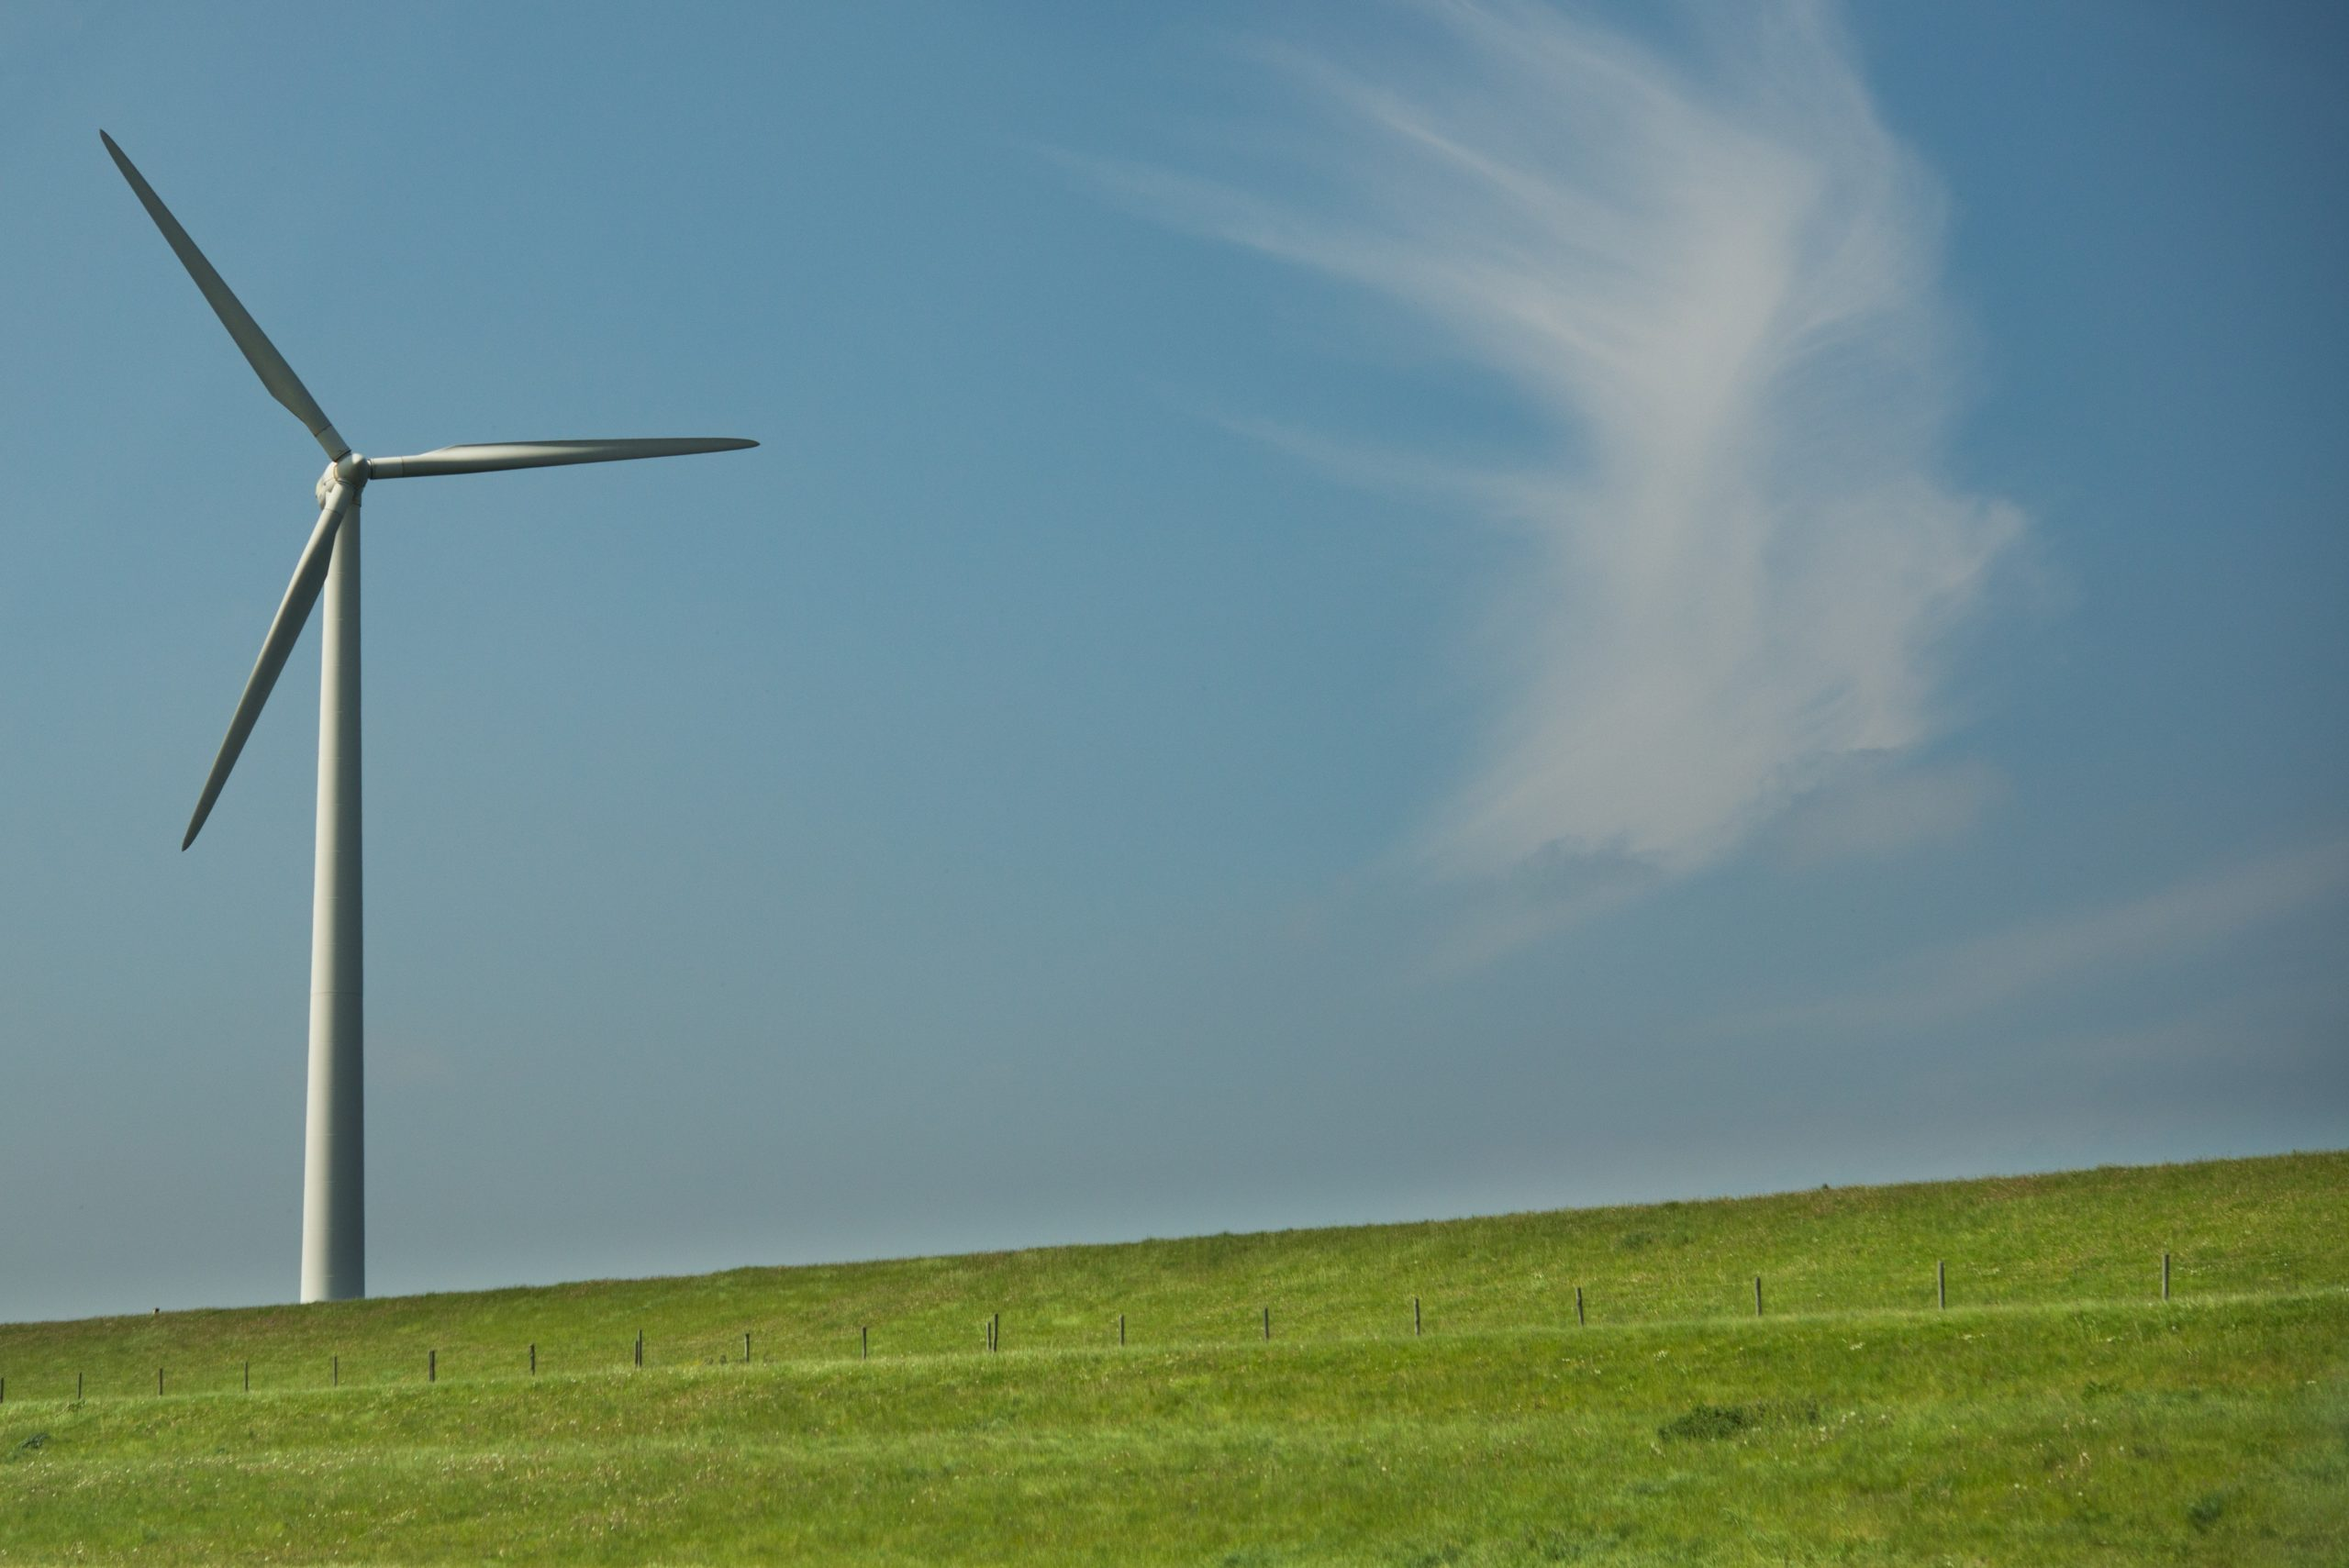

In [19]:
from IPython.display import Image
Image(filename = 'C:/Users/prash/RISL/windmill.jpg',width=300,height=200)

In [22]:
preprocessed_image = prepare_image('windmill.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions) #top 5 predictions
results

40960/35363 [==================================] - 0s 1us/step


[[('n03355925', 'flagpole', 0.4544797),
  ('n03976657', 'pole', 0.27098292),
  ('n11879895', 'rapeseed', 0.038190123),
  ('n02231487', 'walking_stick', 0.019621065),
  ('n07802026', 'hay', 0.011348569)]]

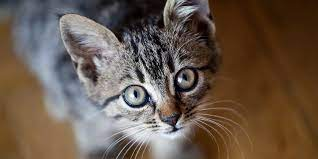

In [25]:
from IPython.display import Image
Image(filename = 'C:/Users/prash/RISL/cat1.jpg',width=300,height=200)

In [26]:
preprocessed_image = prepare_image('cat1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions) #top 5 predictions
results

[[('n02124075', 'Egyptian_cat', 0.79727167),
  ('n02123045', 'tabby', 0.16516805),
  ('n02127052', 'lynx', 0.020197853),
  ('n02123159', 'tiger_cat', 0.016491722),
  ('n02129604', 'tiger', 0.00027765057)]]

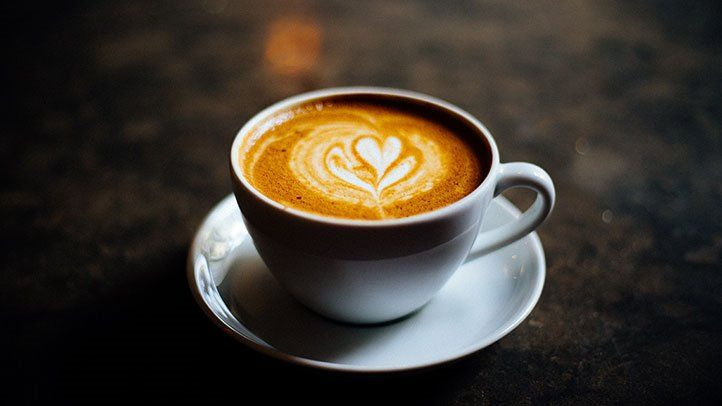

In [29]:
from IPython.display import Image
Image(filename = 'C:/Users/prash/RISL/coffee.jpg',width=300,height=200)

In [30]:
preprocessed_image = prepare_image('coffee.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions) #top 5 predictions
results

[[('n07920052', 'espresso', 0.9523688),
  ('n07930864', 'cup', 0.04319097),
  ('n04263257', 'soup_bowl', 0.0021619678),
  ('n03063599', 'coffee_mug', 0.0013114661),
  ('n07932039', 'eggnog', 0.00033197278)]]

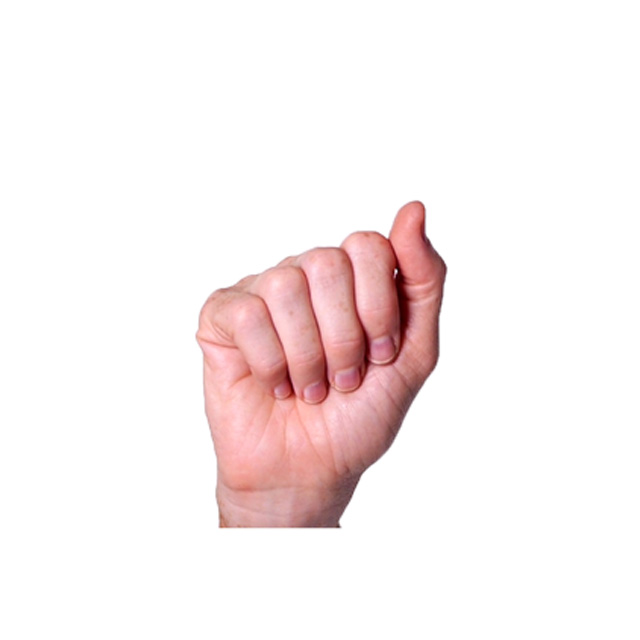

In [31]:
from IPython.display import Image
Image(filename = 'C:/Users/prash/RISL/sign.jpg',width=300,height=200)

In [32]:
preprocessed_image = prepare_image('sign.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions) #top 5 predictions
results

[[('n02786058', 'Band_Aid', 0.15533853),
  ('n03314780', 'face_powder', 0.07491152),
  ('n04372370', 'switch', 0.0422091),
  ('n03250847', 'drumstick', 0.034957353),
  ('n03729826', 'matchstick', 0.031566836)]]

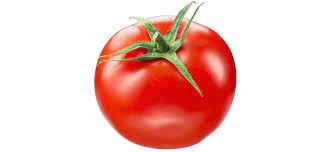

In [37]:
from IPython.display import Image
Image(filename = 'C:/Users/prash/RISL/tomato.jpg',width=300,height=200)

In [38]:
preprocessed_image = prepare_image('tomato.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions) #top 5 predictions
results

[[('n04023962', 'punching_bag', 0.24485438),
  ('n07720875', 'bell_pepper', 0.20327328),
  ('n07716906', 'spaghetti_squash', 0.118997924),
  ('n03793489', 'mouse', 0.08244427),
  ('n04522168', 'vase', 0.05294004)]]

In [41]:
#Organize data into train, valid and test directories
os.chdir('C:/Users/prash/RISL/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False:   #checking if a file like this already exists in disk
    os.mkdir('train')     #making 3 directories
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0,10):    #iterating from 0 to 9 directory
        shutil.move(f'{i}','train')  #moving say 0 directory to train directory
        os.mkdir(f'valid/{i}')  #making i, say 0 named directory in valid directory
        os.mkdir(f'test/{i}')   #making i, say 0 named directory in test directory
        
        valid_samples = random.sample(os.listdir(f'train/{i}'),30)   #randomly selecting 30 samples from train/0 (eg)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}',f'valid/{i}')    #moving the 30 samples one by one to valid/0 (eg)
        
        test_samples = random.sample(os.listdir(f'train/{i}'),5)      #randomly selecting 5 samples from train/0 (eg)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}',f'test/{i}')     #moving the 5 samples one by one to test/0 (eg)
os.chdir('../..')

In [43]:
train_path = 'C:/Users/prash/RISL/Sign-Language-Digits-Dataset/train'
valid_path = 'C:/Users/prash/RISL/Sign-Language-Digits-Dataset/valid'
test_path = 'C:/Users/prash/RISL/Sign-Language-Digits-Dataset/test'

In [44]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = train_path, target_size =(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = valid_path, target_size =(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = test_path, target_size =(224,224), batch_size=10 ,shuffle=False) #shuffle false so that we can later plot the confusion matrix

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


# fine tuning model to custom data

In [46]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [47]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [49]:
#mobilenet is a functional model and not structural model!??
x = mobile.layers[-6].output #we are taking above displayed layers from original model till 6th last layer. this is decided by trial and error, what should be included and not. last 5 layers we are not including.
output = Dense(units=10, activation='softmax')(x)  #functional #units=10 as numbers 0 to 9 we are considering in dataset

In [50]:
model = Model(inputs=mobile.input, outputs=output) #Model with original mobilenet input and above declared output

In [51]:
#freezing all layers except last 23 (trial and error) for training the model.
for layer in model.layers[:-23]:   #total 88 layers in mobilenet
    layer.trainable = False

In [52]:
model.summary()  #we can see output layer with 10 classes here instead of 10000 classes in original model.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Train the model

In [54]:
model.compile(optimizer = Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
#Run for more epochs (~30) to see better results
model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10
172/172 - 61s - loss: 0.0129 - accuracy: 0.9988 - val_loss: 0.0470 - val_accuracy: 0.9900
Epoch 2/10
172/172 - 64s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0475 - val_accuracy: 0.9900
Epoch 3/10
172/172 - 65s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9867
Epoch 4/10
172/172 - 68s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0390 - val_accuracy: 0.9900
Epoch 5/10
172/172 - 68s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9900
Epoch 6/10
172/172 - 69s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9933
Epoch 7/10
172/172 - 69s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9967
Epoch 8/10
172/172 - 68s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9967
Epoch 9/10
172/172 - 69s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 0.9967
Epoch 10/10
172/172 - 69s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0296 - val_accura

# Predict sign language digits

In [57]:
test_labels = test_batches.classes  #storing true labels

In [58]:
predictions = model.predict(x=test_batches, verbose=0) #model is predicting

In [59]:
test_batches.class_indices #checking our classes are correct

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [61]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


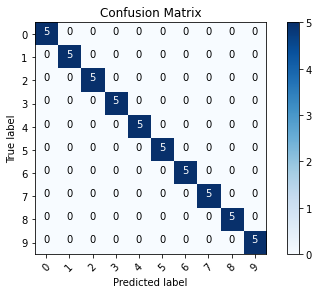

In [64]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']  #giving labels for confusion matrix
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')